# Solving the March TPS Without Machine Learning

We don't need machine learning to predict congestions for September 30. It suffices to determine the median congestion for every place and time of day and submit these medians.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, PercentFormatter
from cycler import cycler
from IPython import display

oldcycler = plt.rcParams['axes.prop_cycle']
plt.rcParams['axes.facecolor'] = '#0057b8' # blue
plt.rcParams['axes.prop_cycle'] = cycler(color=['#ffd700'] +
                                         oldcycler.by_key()['color'][1:])

In [2]:
# Read the data
train = pd.read_csv('../input/tabular-playground-series-mar-2022/train.csv', index_col='row_id', parse_dates=['time'])
test = pd.read_csv('../input/tabular-playground-series-mar-2022/test.csv', index_col='row_id', parse_dates=['time'])

In [3]:
# Feature Engineering
for df in [train, test]:
    df['weekday'] = df.time.dt.weekday
    df['hour'] = df.time.dt.hour
    df['minute'] = df.time.dt.minute
    

In [4]:
# Compute the median congestion for every place and time of week
medians = train.groupby(['x', 'y', 'direction', 'weekday', 'hour', 'minute']).congestion.median().astype(int)
medians

x  y  direction  weekday  hour  minute
0  0  EB         0        0     0         35
                                20        35
                                40        35
                          1     0         35
                                20        35
                                          ..
2  3  WB         6        22    20        40
                                40        44
                          23    0         41
                                20        38
                                40        39
Name: congestion, Length: 32760, dtype: int64

In [5]:
# Write the submission file
sub = test.merge(medians, 
                 left_on=['x', 'y', 'direction', 'weekday', 'hour', 'minute'],
                 right_index=True)[['congestion']]
sub.reset_index(inplace=True)
sub.to_csv('submission_no_machine_learning.csv', index=False)
sub

,row_id,congestion
0,848835,47
1,848836,35
2,848837,56
3,848838,22
4,848839,72
...,...,...
2335,851170,68
2336,851171,25
2337,851172,71
2338,851173,11


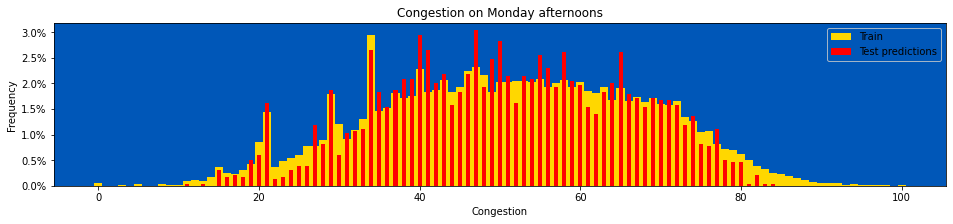

In [6]:
# Plot the distribution of the test predictions
# compared to the other Monday afternoons
plt.figure(figsize=(16,3))
plt.hist(train.congestion[((train.time.dt.weekday == 0) &
                           (train.time.dt.hour >= 12)).values],
         bins=np.linspace(-0.5, 100.5, 102),
         density=True, label='Train',
         color='#ffd700')
plt.hist(sub['congestion'], np.linspace(-0.5, 100.5, 102),
         density=True, rwidth=0.5, label='Test predictions',
         color='r')
plt.xlabel('Congestion')
plt.ylabel('Frequency')
plt.title('Congestion on Monday afternoons')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=1))
plt.legend()
plt.show()